# Analisis de Paquetes
Lab

## Importaciones de Paquetes necesarios

In [54]:
# analysis de datos
import pandas as pd

# Graficas
import matplotlib.pyplot as plt

# analysis de paquetes
from scapy.all import rdpcap, sniff, wrpcap, rdpcap
from scapy.layers.inet import TCP, UDP

## Leer 10 paquetes

In [7]:
# Capturar 10 paquetes
captured_packets = sniff(count=10)

# Guardar los paquetes capturados en un archivo .pcap
file_path = "captured_packets.pcap"
wrpcap(file_path, captured_packets)

# Leer el archivo .pcap
packets = rdpcap(file_path)

# Imprimir el tipo de datos, la longitud y el contenido del archivo .pcap
print("Tipo de datos: ", type(packets))
print("Cantidad de paquetes: ", len(packets))
print("Contenido del archivo .pcap:")

for packet in packets:
    print(packet)


Tipo de datos:  <class 'scapy.plist.PacketList'>
Cantidad de paquetes:  10
Contenido del archivo .pcap:
Ether / IP / UDP 192.168.1.73:35363 > 66.22.223.108:50011 / Raw
Ether / IP / UDP 66.22.223.108:50011 > 192.168.1.73:35363 / Raw
Ether / IP / UDP 192.168.1.73:35363 > 66.22.223.108:50011 / Raw
Ether / IP / UDP 66.22.223.108:50011 > 192.168.1.73:35363 / Raw
Ether / IP / UDP 66.22.223.108:50011 > 192.168.1.73:35363 / Raw
Ether / IP / UDP 66.22.223.108:50011 > 192.168.1.73:35363 / Raw
Ether / IP / UDP 66.22.223.108:50011 > 192.168.1.73:35363 / Raw
Ether / IP / UDP 66.22.223.108:50011 > 192.168.1.73:35363 / Raw
Ether / IP / UDP 66.22.223.108:50011 > 192.168.1.73:35363 / Raw
Ether / IP / UDP 66.22.223.108:50011 > 192.168.1.73:35363 / Raw


## Combinarlos al archivo analisis_paquetes

In [8]:
# Leer el archivo .pcap existente
existing_file_path = "analisis_paquetes.pcap"
existing_packets = rdpcap(existing_file_path)

# Combinar los paquetes capturados y los paquetes existentes
combined_packets = existing_packets + captured_packets

# Guardar los paquetes combinados en un nuevo archivo .pcap
combined_file_path = "combined_packets.pcap"
wrpcap(combined_file_path, combined_packets)

print("Paquetes combinados y guardados en:", combined_file_path)

Paquetes combinados y guardados en: combined_packets.pcap


## Cargar datos a un pd.Dataframe

In [9]:
packets = rdpcap("analisis_paquetes.pcap")

In [15]:
# Extraer datos a una lista
data = []
# Escoger los datos que necesitamos
# Tiempo, Src Addres, Dst Address, Src Port y Dst Port
for packet in packets:
    timestamp = packet.time
    src_ip = packet[0][1].src
    dst_ip = packet[0][1].dst
   # Hay que ver si tiene una capa de TCP o de UDP
    if packet.haslayer(TCP):
        src_port = packet[TCP].sport
        dst_port = packet[TCP].dport
    elif packet.haslayer(UDP):
        src_port = packet[UDP].sport
        dst_port = packet[UDP].dport
    else:
        src_port = None
        dst_port = None

    data.append([timestamp, src_ip, dst_ip, src_port, dst_port])

# Crear un DF en base de esa lista con los titulos de las columnas
df = pd.DataFrame(data, columns=["Tiempo", "Src_Addres", "Dst_Address", "Src_Port", "Dst_Port"])

In [39]:
df.head(10)

,Tiempo,Src_Addres,Dst_Address,Src_Port,Dst_Port
0,1532199330.917674,10.1.10.53,84.54.22.33,53,53
1,1532199330.950107,84.54.22.33,10.1.10.53,53,53
2,1532199331.937777,10.1.10.53,84.54.22.33,53,53
3,1532199331.956635,84.54.22.33,10.1.10.53,53,53
4,1532199332.960504,10.1.10.53,84.54.22.33,53,53
5,1532199332.971509,84.54.22.33,10.1.10.53,53,53
6,1532199333.982248,10.1.10.53,84.54.22.33,53,53
7,1532199333.993114,84.54.22.33,10.1.10.53,53,53
8,1532199335.003376,10.1.10.53,84.54.22.33,53,53
9,1532199335.028202,84.54.22.33,10.1.10.53,53,53


## Estadísticas

a. Muestre cual es la IP origen más frecuente

In [38]:
df.groupby("Src_Addres").agg(Count=('Src_Port', 'count')).sort_values("Count", ascending=False)

,Count
Src_Addres,
10.1.10.53,31
84.54.22.33,29
75.75.75.75,2


b. Muestre cual es la IP destino más frecuente

In [36]:
df.groupby("Dst_Address").agg(Count=('Dst_Address', 'count')).sort_values("Count", ascending=False)

,Count
Dst_Address,
10.1.10.53,31
84.54.22.33,29
75.75.75.75,2


c. ¿A qué IPs se comunica la IP del inciso a?

In [49]:
df[df['Src_Addres'] == "10.1.10.53"].groupby("Dst_Address").agg(Count=("Tiempo", "count"))

,Count
Dst_Address,
75.75.75.75,2
84.54.22.33,29


d. ¿A qué puertos destino se comunica la IP del inciso a?

In [50]:
df[df['Src_Addres'] == "10.1.10.53"].groupby("Dst_Port").agg(Count=("Tiempo", "count"))

,Count
Dst_Port,
53,31


e. ¿A qué puertos origen se comunica la IP del inciso b?

In [51]:
df[df['Dst_Address'] == "10.1.10.53"].groupby("Dst_Port").agg(Count=("Tiempo", "count"))

,Count
Dst_Port,
53,29
15812,1
23903,1


f. Indique el propósito de los puertos que más aparece en los incisos d y e

inciso d: Puerto 53 - Domain Name Service <br>
Inciso e: Puerto 53, puerto 15812 - puerto de uso de software costumizado puede ser una vurnerabilidad y 23903 - este es conocido por un puerto que usan los viruses

## Graficas

a. Muestre una gráfica 2D, en el eje Y las IPs origen, y en el eje X la suma de los payloads
enviados de dichas direcciones

In [90]:
values = df.groupby("Src_Addres").agg(count=("Tiempo", "count")).reset_index().sort_values("Src_Addres").values
x = values[:,0]
y = values[:,1]

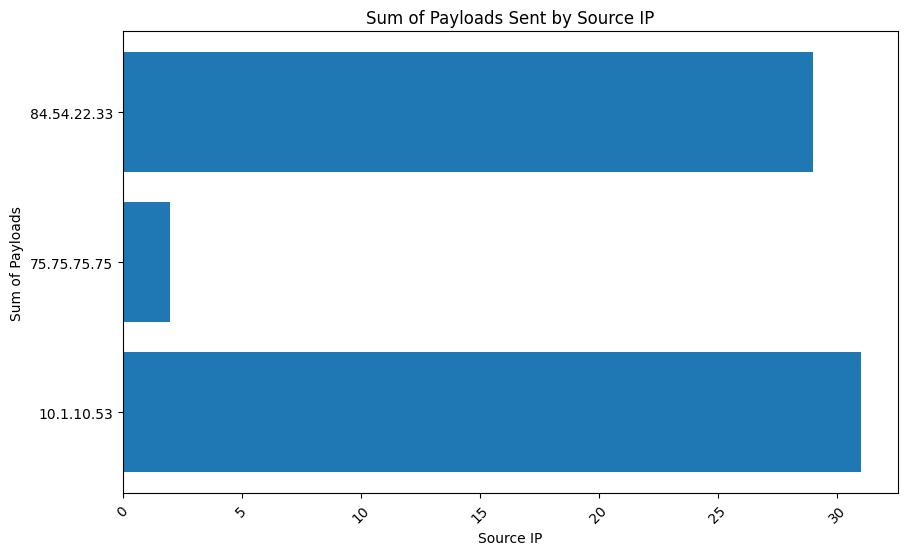

In [92]:
plt.figure(figsize=(10, 6))
plt.barh( x, y)
plt.xlabel("Source IP")
plt.ylabel("Sum of Payloads")
plt.title("Sum of Payloads Sent by Source IP")
plt.xticks(rotation=45)
plt.show()

b. Muestre una gráfica 2D, en el eje Y las IPs destino, y en el eje X la suma de los payloads
recibidos en dichas direcciones.

In [6]:
import pandas as pd
df = pd.read_csv('Test_data.csv')

In [7]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [ ]:
values = df.groupby('dst')['payload'].sum()

plt.barh(values.index, values.values)
plt.ylabel('IPs dst')
plt.xlabel('Suma de payloads recibidos')
plt.show()

In [ ]:


puertos_unicos = df['sport'].unique()
payloads_por_puerto = df.groupby('sport')['payload'].sum()

plt.bar(payloads_por_puerto.index, payloads_por_puerto.values)
plt.ylim(min(puertos_unicos), max(puertos_unicos))
plt.ylabel('Puertos de origen')
plt.xlabel('Suma de los payloads enviados')
plt.show()


In [ ]:
puertos_unicos = df['dport'].unique()
payloads_por_puerto2 = df.groupby('dport')['payload'].sum()

plt.bar(payloads_por_puerto2.index, payloads_por_puerto2.values)
plt.ylim(min(puertos_unicos), max(puertos_unicos))
plt.ylabel('Puertos destino')
plt.xlabel('Suma de payloads recibidos')
plt.show()

In [ ]:
a. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen
más frecuente

In [ ]:
n_df = df[df['src'] == frequent_address1]
n_df2 = nuevo_df[['src', 'dst', 'payload']]


n_df3 = n_df2.groupby(['payload', 'src', 'dst']).size().reset_index(name='count')
n_df3

In [ ]:
b. Obtenga un nuevo DF con las columnas Src Address, Dst Address y agrúpelas por
payload

In [ ]:
df2 = n_df3.groupby('dst', as_index=False)['payload'].sum()
df3 = df2.sort_values('payload', ascending=False)
ip_intercambio_max = df3.iloc[0]['dst']
ip_intercambio_max

In [ ]:
c. Obtenga la IP que más ha intercambiado bytes con la IP más frecuente. Esta IP es
sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.
d. Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.

In [ ]:
c = (df['src'] == frequent_address1) & (df['dst'] == ip_intercambio_max)
n_df4 = df.loc[condicion]

payloads1 = df['payload_raw'].to_numpy()
print(payloads1, "\n\n")

payloads2 = df['payload_hex'].to_numpy()
print(payloads2, "\n\n")